In [26]:
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [27]:
# Database Parameters
db_name = 'squall'  # Name of Application
coll_name = 'Fibonacci Demo'  # Name of Experiment

In [28]:
# Connect to database and extract collection
client = MongoClient("localhost", 27017)
db = client[db_name]
coll = db[coll_name]

In [40]:
# Construct DataFrame
# query = {}
query = { "$where": "this.params.A == this.params.B" }
results = pd.DataFrame(np.array([(job['Product'],
                                  job['params']['A']+job['params']['B'],
                                  job['params']['A']*job['params']['B'],
                                  job['cpuA'] + job['cpuB'],
                                  job['cpuA'] * job['cpuB'],
                                  job['params']['A'],
                                  job['fibA'],
                                  job['cpuA'],
                                  job['params']['B'],
                                  job['fibB'],
                                  job['cpuB']) 
                                 for job in coll.find(query)]),
                       columns=['product', 'A+B', 'AxB', 'cpu+', 'cpu*',
                                'A', 'fibA', 'cpuA',
                                'B', 'fibB', 'cpuB'])

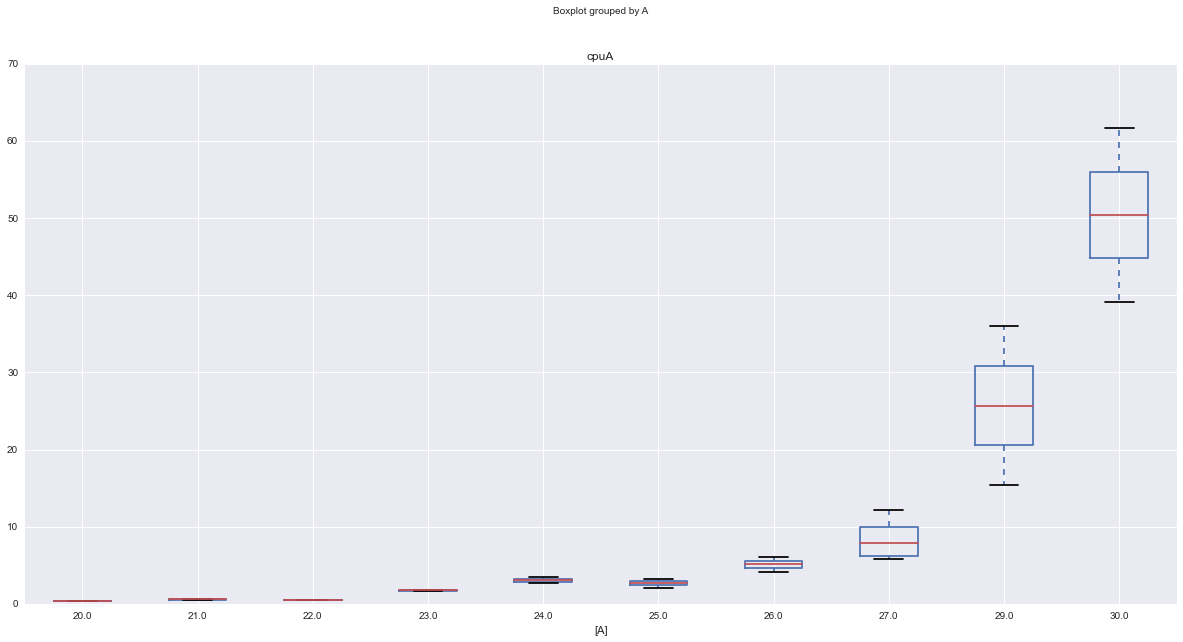

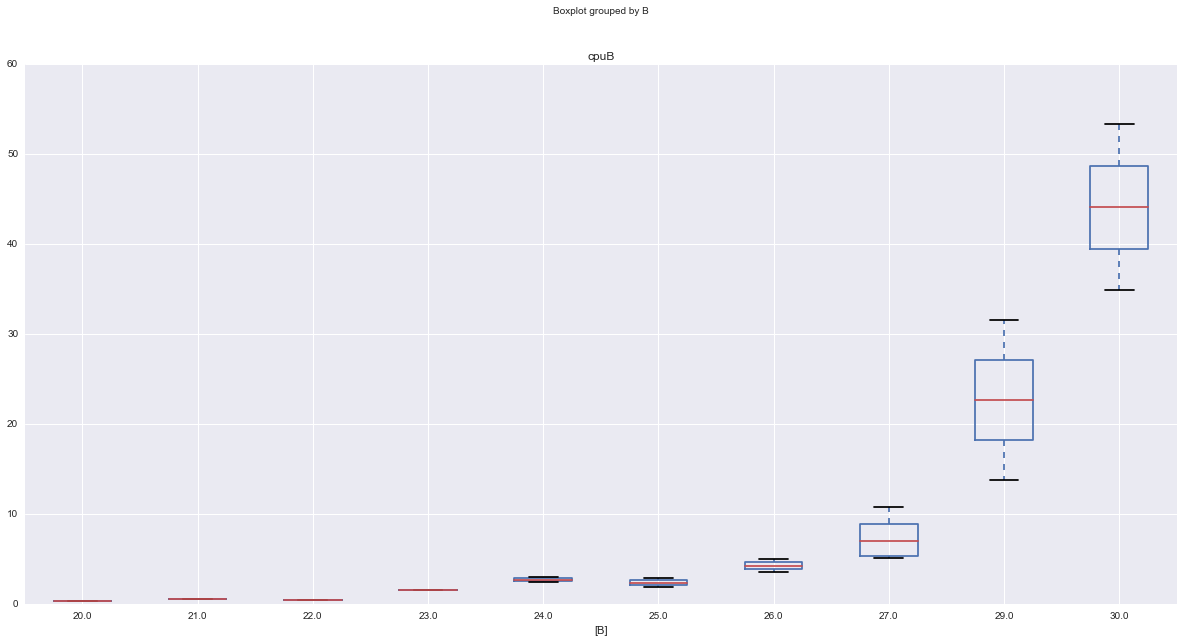

In [41]:
results.boxplot(by =['A'], column='cpuA')
plt.show()
results.boxplot(by =['B'], column='cpuB')
plt.show()

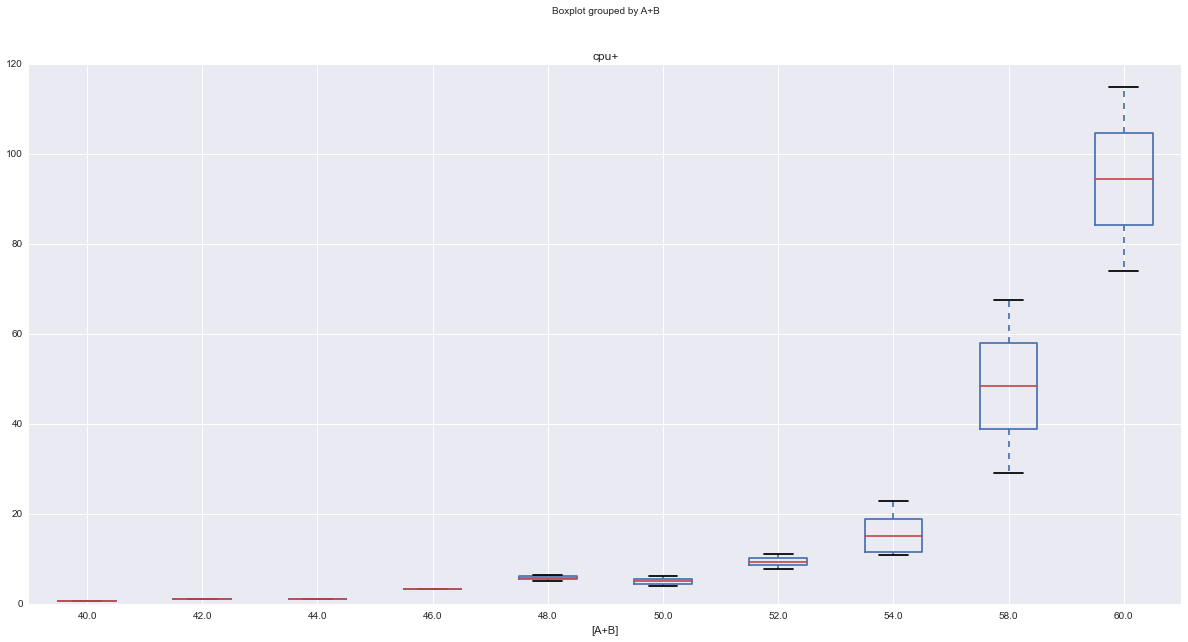

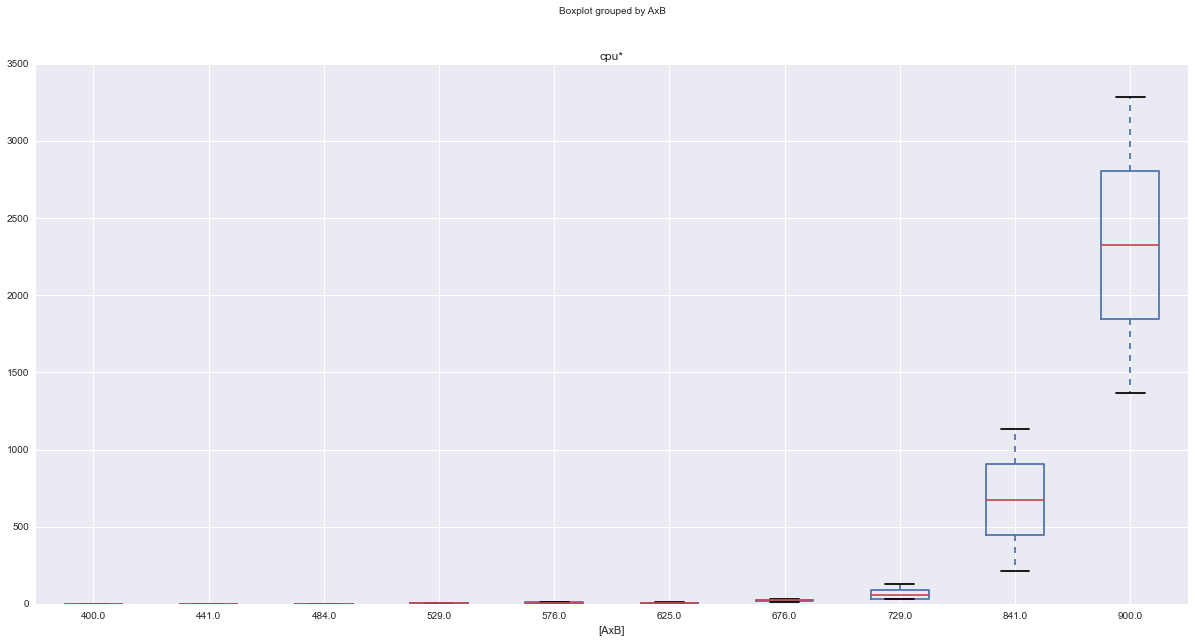

In [42]:
results.boxplot(by=['A+B'], column='cpu+')
plt.show()
results.boxplot(by=['AxB'], column='cpu*')
plt.show()

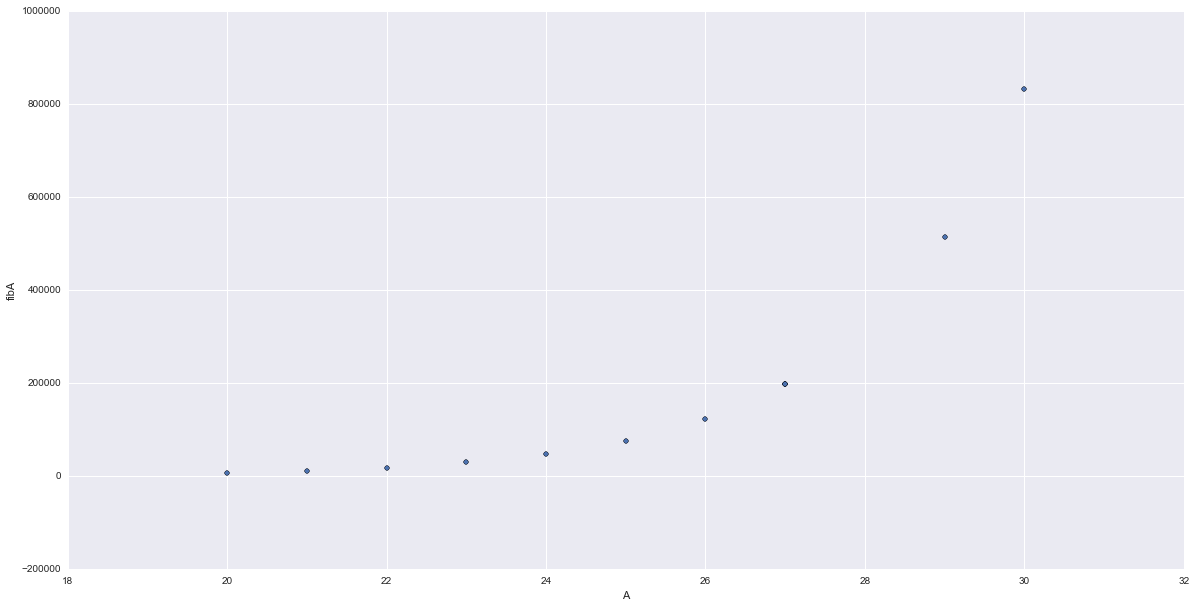

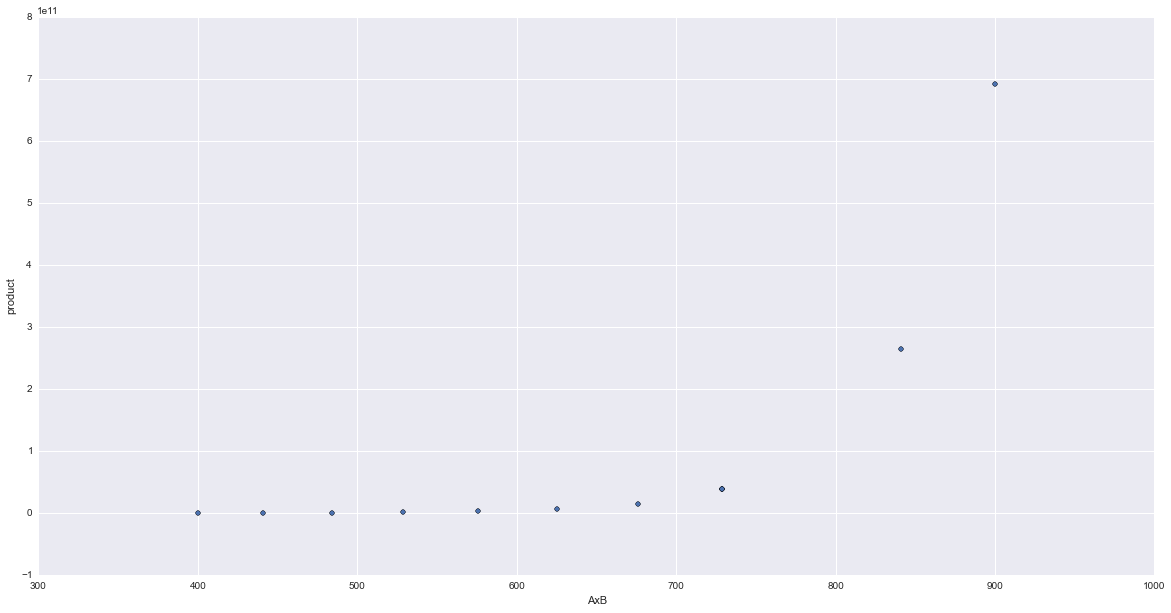

In [43]:
results.plot(kind='scatter', x='A', y='fibA')
plt.show()
results.plot(kind='scatter', x='AxB', y='product')
plt.show()